In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [29]:
df = pd.read_csv('No-show.csv')

In [30]:
df.head(50)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [31]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Converting the string datatype 'No' and 'Yes' from 'No-show' column to integer datatype.

In [32]:
df['No-show'] = df['No-show'].map({'No':0,'Yes':1})

Basic analysis of 'No-show' with respect to age of the patient.

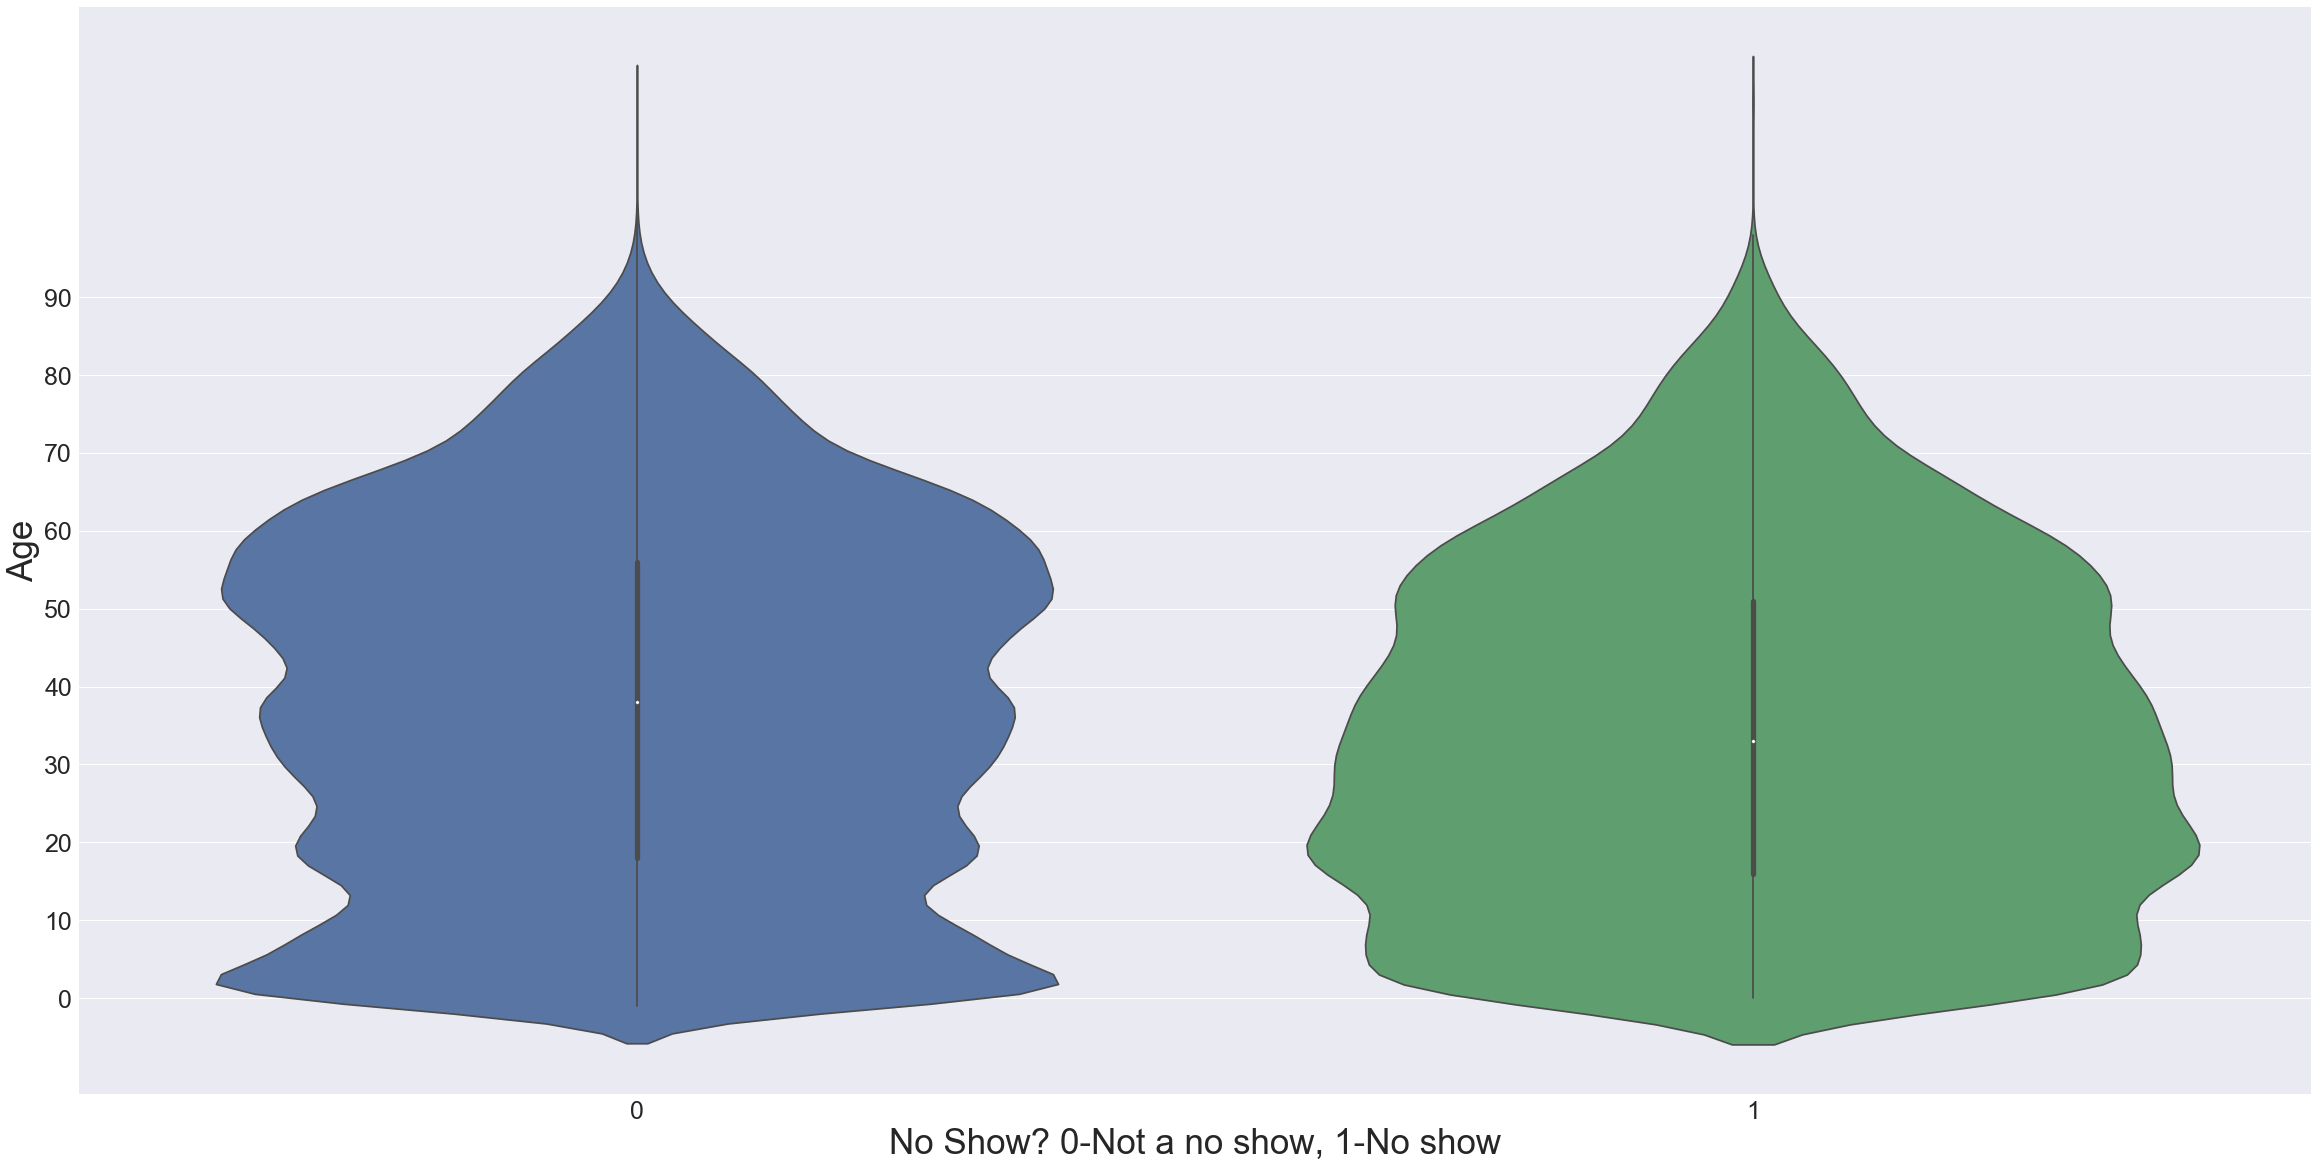

In [33]:
plt.figure(figsize=(40,20))

#sns.barplot(x="Type",y="Count", data=df)
#no_show.Neighbourhood[no_show['No-show']==1].value_counts().plot()#(type='bar')

sns.violinplot(x='No-show', y='Age', data=df)#, errors='coerce')
plt.xticks(size=25)
plt.yticks([x for x in range(0,100,10)],size=25)
plt.xlabel("No Show? 0-Not a no show, 1-No show", size=35)
plt.ylabel("Age", size=35)
plt.show()

In [34]:
df['AppointmentDay'] = df['AppointmentDay'].str.strip('T00:00:00Z')
df['ScheduledDay'] = df['ScheduledDay'].str[:10]

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['Appointment Day'] = df['AppointmentDay'].dt.dayofweek
df['Scheduled Day'] = df['ScheduledDay'].dt.dayofweek

The number of days between the Appointment Day and Schduled day.
If there are many days in the middle, the patient might start feeling well and not show up.

In [35]:
df['Difference'] = df['AppointmentDay'] - df['ScheduledDay']

We create a copy of the dataset.

In [36]:
df_copy = df.copy()

In [37]:
df_copy.drop(['AppointmentDay'], inplace=True, axis=1)
df_copy.drop(['ScheduledDay'], inplace=True, axis=1)
df_copy.drop(['PatientId','AppointmentID'], inplace=True, axis=1)

In [38]:
df_copy['Difference'] = df_copy['Difference'].astype(str)

In [39]:
df_copy['Difference'] = df_copy['Difference'].str[:1]

In [40]:
df_copy.Difference.value_counts()

0    34154
1    17906
2    16242
-     9628
3     7716
4     6869
7     5122
6     4788
5     4160
8     2322
9     1620
Name: Difference, dtype: int64

We now use labelencoder to convert all the string type of data to appropriate int value.

In [41]:
le = LabelEncoder()
for i in df_copy.select_dtypes(include=['O']).columns:
    df_copy[i] = le.fit_transform(df_copy[i])

In [42]:
y = df_copy['No-show']

In [43]:
df_copy.drop(['No-show'], inplace=True, axis=1)

In [44]:
X= df_copy

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.72556470339877555